In [76]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import validation_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:

from sklearn.datasets import fetch_openml

X, y = fetch_openml(
    "mnist_784", version=1, return_X_y=True, as_frame=False, parser="pandas"
)

#train_data = pd.read_csv("../input/train.csv") #reading the csv files using pandas
#test_data = pd.read_csv("../input/test.csv")

In [78]:
X[0,:].shape

(784,)

3


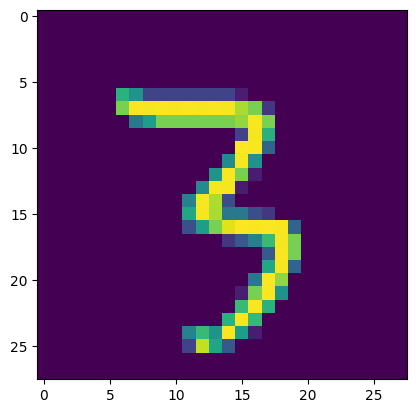

In [79]:
plt.imshow(X[44,:].reshape(28,28))
print(y[44])

In [80]:
np.unique(X[0,:])

array([  0,   1,   2,   3,   9,  11,  14,  16,  18,  23,  24,  25,  26,
        27,  30,  35,  36,  39,  43,  45,  46,  49,  55,  56,  64,  66,
        70,  78,  80,  81,  82,  90,  93,  94, 107, 108, 114, 119, 126,
       127, 130, 132, 133, 135, 136, 139, 148, 150, 154, 156, 160, 166,
       170, 171, 172, 175, 182, 183, 186, 187, 190, 195, 198, 201, 205,
       207, 212, 213, 219, 221, 225, 226, 229, 238, 240, 241, 242, 244,
       247, 249, 250, 251, 252, 253, 255], dtype=int64)

In [81]:
X = X/255.0

### Q1
whiten the data using function from sklearn.preprocessing
whiten is mean 0 and var 1

In [82]:
# whiten the data 
from sklearn.preprocessing import StandardScaler

from sklearn.preprocessing import scale

scaler = StandardScaler()

X_scale = scale(X)

scaled = scaler.fit_transform(X)



In [83]:
squarer = lambda t: int(t)
vfunc = np.vectorize(squarer)
y = vfunc(y)
y

array([5, 0, 4, ..., 4, 5, 6])

In [84]:
np.unique(y,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([6903, 7877, 6990, 7141, 6824, 6313, 6876, 7293, 6825, 6958],
       dtype=int64))

In [85]:
#Fill in
def train_and_test_split(X,y):
    tr_index = []
    te_index = []
    
    for i in range(10):
        perm = np.random.permutation(np.where(y==i)[0])
        p = int(np.round(len(perm)*0.7))
        tr_index.extend(perm[:p])
        te_index.extend(perm[p+1:])
    tr_index = np.random.permutation(tr_index)
    te_index = np.random.permutation(te_index)
    X_train = X[tr_index,:]
    y_train = y[tr_index]
    X_test = X[te_index,:]
    y_test = y[te_index]
    return X_train,y_train,X_test,y_test

In [86]:
X_train,y_train,X_test,y_test = train_and_test_split(X_scale,y)

0


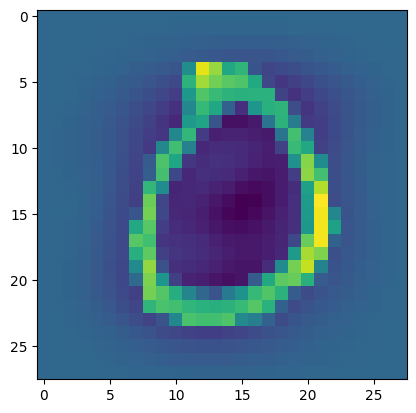

In [87]:
plt.imshow(X_train[10,:].reshape(28,28))
print(y_train[10])

In [88]:
model_linear = SVC(kernel='linear')
model_linear.fit(X_train, y_train)

SVC(kernel='linear')

In [89]:
y_pred = model_linear.predict(X_test)


7 7


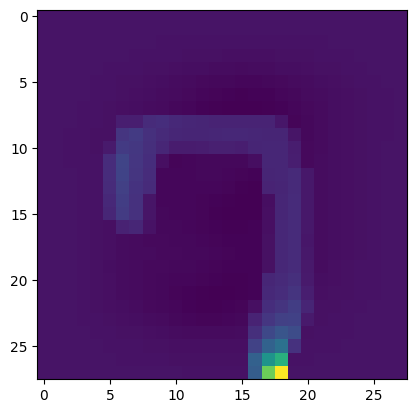

In [90]:
plt.imshow(X_test[10,:].reshape(28,28))
print(y_test[10],y_pred[10])

In [91]:
np.count_nonzero(y_pred!=y_test)

1654

### Q2
use sklearn.metrics to get accuracy score and confusion matrix 

In [92]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix

print(metrics.accuracy_score(y_true=y_test, y_pred=y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)


cm


0.9211968173805326


array([[2017,    1,    7,    2,    5,   19,   10,    1,    8,    0],
       [   0, 2315,   11,    4,    1,    4,    2,    3,   22,    0],
       [  16,   26, 1911,   35,   29,    4,   23,   22,   25,    5],
       [   5,   18,   65, 1924,    1,   66,    5,   16,   31,   10],
       [   5,   10,   31,    7, 1914,    5,   10,   10,    6,   48],
       [  25,    8,   20,   83,   12, 1679,   22,    2,   27,   15],
       [  22,    6,   34,    2,   25,   40, 1926,    2,    5,    0],
       [   3,    9,   34,   15,   18,    6,    1, 2049,    4,   48],
       [  21,   35,   48,   65,    6,   59,   10,    7, 1773,   22],
       [  14,   12,    9,   32,   84,    5,    0,   88,   15, 1827]],
      dtype=int64)

In [93]:
non_linear_model = SVC(kernel='rbf')

# fit
non_linear_model.fit(X_train, y_train)

# predict
y_pred = non_linear_model.predict(X_test)

In [94]:
print(metrics.accuracy_score(y_true=y_test, y_pred=y_pred))
cm = metrics.confusion_matrix(y_test, y_pred)


cm

0.9631711849063795


array([[2040,    1,    2,    1,    2,    6,   11,    4,    3,    0],
       [   0, 2332,    9,    2,    1,    0,    2,   11,    4,    1],
       [   4,    5, 2027,   11,    7,    0,    8,   18,   12,    4],
       [   1,    7,   33, 2021,    0,   27,    0,   31,   18,    3],
       [   3,    4,   14,    1, 1965,    1,    5,    8,    6,   39],
       [   4,    2,    6,   23,    3, 1810,   15,   15,   11,    4],
       [  12,    2,   11,    1,    8,   13, 1993,   14,    8,    0],
       [   2,    8,   10,    2,    9,    0,    0, 2138,    1,   17],
       [   3,   11,   13,   15,   10,   19,    7,   19, 1938,   11],
       [   4,    4,   12,   22,   29,    2,    0,   53,    8, 1952]],
      dtype=int64)

### Q3
Use PCA from sklearn.decomposition to reduce dimensionality of feature space.
reduce to 256 features
and then train and do evaluation

In [95]:
from sklearn.decomposition import PCA

pca = PCA(n_components=256)
reduced_features = pca.fit_transform(X_train)



7 7


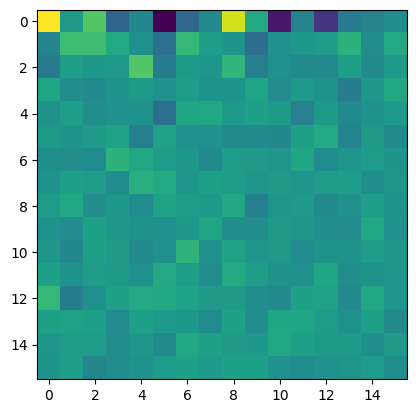

In [96]:
plt.imshow(reduced_features[10,:].reshape(16,16))
print(y_test[10],y_pred[10])

In [97]:
print(metrics.accuracy_score(y_true=y_test, y_pred=reduced_features))
cm = metrics.confusion_matrix(y_test, reduced_features)

cm

ValueError: Found input variables with inconsistent numbers of samples: [20989, 49001]